In [1]:
#!jt -t monokai -T -N -kl
#!jt -r

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [3]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 14)
#plt.style.use('dark_background')
plt.style.use('ggplot')

In [4]:
url_country = 'https://github.com/datasets/covid-19/raw/master/data/countries-aggregated.csv'
country_df = pd.read_csv(url_country)[['Date', 'Country', 'Deaths']]

In [5]:
W = pd.DataFrame(country_df.groupby('Date').sum())
W['Country'] = ['World' for _ in range(len(W))]
W['Date'] = W.index
country_df = country_df.append(W)

In [6]:
Deaths = pd.DataFrame()
Deaths['Date'] = country_df.Date.unique()
Deaths['Date'] = pd.to_datetime(Deaths.Date)
#Deaths = Deaths.set_index('Date')

In [7]:
countries = country_df['Country'].unique()
for c in countries:
    cun = country_df[country_df.Country == c].Deaths
    if 'Korea' in c:
        c = 'S.Korea'
    if c == 'United Kingdom':
        c = 'UK'
    Deaths[c] = list(cun)
Deaths = Deaths.set_index('Date')

In [8]:
Important_countries = ['India', 'World', #'World without China',
                      'US', 'Germany', 'Italy', 'Spain', 'China',
                      'UK', 'France',
                      'S.Korea', 'Iran', 
                       'Russia', 'Mexico', 'Canada']#[::-1]
colors = {'India': 'Blue', 'World': 'Blue', 'World without US': 'Green', 'US': 'Black', 'China': 'red', 
          'Spain': 'yellow','Italy': 'grey', 'Iran': 'brown', 'Ireland': 'violet', 'UK': 'Purple', 
          'S.Korea': 'Black', 'France': 'orange', 'Germany': 'Green', 'Australia': 'Teal',
          'Russia': 'Brown', 'Mexico': 'Orange', 'Canada': 'Teal'}
def plotter(DF, name, log = True):
    plt.figure(figsize = (14, 7))
    if log:
        if log == 'symlog':
            plt.yscale('symlog')
        else:
            plt.yscale('log')
    if len(DF.columns)>len(Important_countries):
        columns = Important_countries
    else:
        columns = DF.columns
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col,
                 linestyle = '-.' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 #alpha = 0.6
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend()
    plt.show()

In [9]:
def plot2(DF, DF2, name1, name2 = 'Deaths', log = True):
    plt.figure(figsize = (14, 7))
    if log:
        plt.xscale('log')
        if log == 'symlog':
            plt.yscale('symlog')
        else:
            plt.yscale('log')
    if len(DF.columns)>len(Important_countries):
        columns = Important_countries
    else:
        columns = DF.columns
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col,
                 linestyle = '-.' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 #alpha = 0.6
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend()
    plt.show()

In [10]:
Deaths.tail(14)[Important_countries]

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-11-24,134699,1409691,259929,14832,51306,43668,4742,55935,50324,513,45738,36675,102739,11676
2020-11-25,135223,1421748,262222,15210,52028,44037,4742,56630,50700,515,46207,37173,103597,11733
2020-11-26,135715,1432489,263456,15640,52850,44374,4742,57128,51041,516,46689,37688,104242,11818
2020-11-27,136200,1443110,264858,16011,53677,44668,4742,57648,51999,522,47095,38175,104242,11916
2020-11-28,136696,1452852,266047,16181,54363,44668,4743,58127,52212,523,47486,38676,105459,11993
2020-11-29,137139,1459771,266873,16306,54904,44668,4743,58342,52410,526,47874,39127,105655,12046
2020-11-30,137621,1468458,268045,16694,55576,45069,4743,58545,52819,526,48246,39491,105940,12147
2020-12-01,138122,1481306,270642,17177,56361,45511,4743,59148,53595,526,48628,40050,106765,12229
2020-12-02,138648,1493742,273446,17659,57045,45784,4744,59796,53906,529,48990,40630,107565,12342


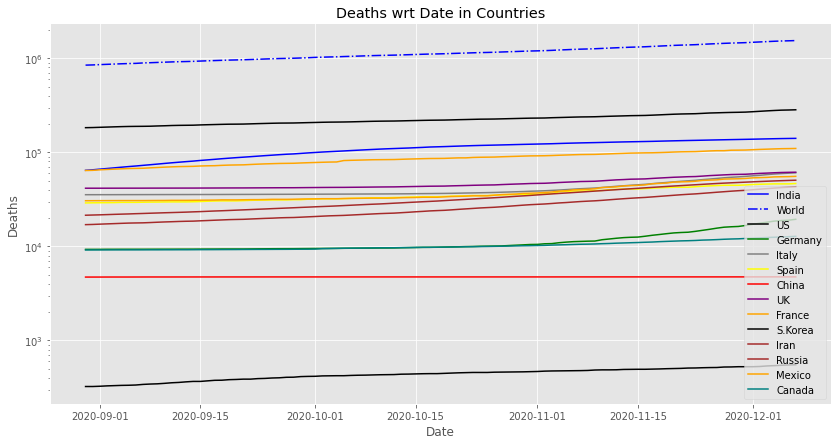

In [11]:
plotter(Deaths[Important_countries].tail(100), 'Deaths')

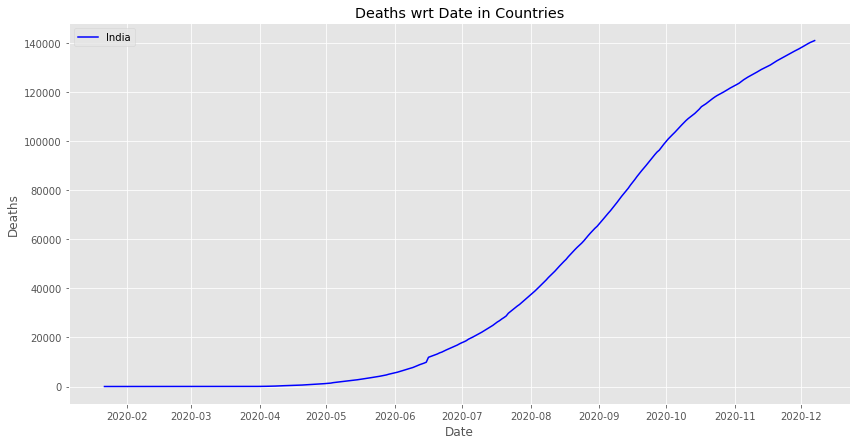

In [12]:
plotter(Deaths[['India']], 'Deaths', False)
#Deaths[['India']].tail(50)

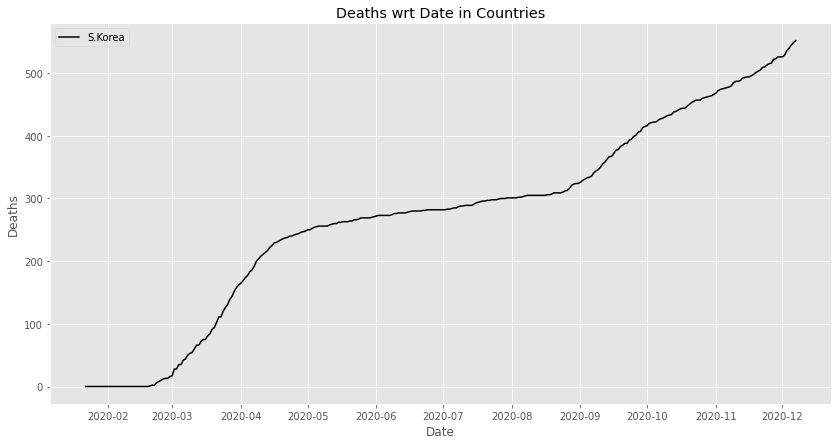

In [13]:
plotter(Deaths[['S.Korea']], 'Deaths', False)

In [14]:
Removed = np.round(Deaths/0.01).astype('int')
Removed[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-11-24,13469900,140969100,25992900,1483200,5130600,4366800,474200,5593500,5032400,51300,4573800,3667500,10273900,1167600
2020-11-25,13522300,142174800,26222200,1521000,5202800,4403700,474200,5663000,5070000,51500,4620700,3717300,10359700,1173300
2020-11-26,13571500,143248900,26345600,1564000,5285000,4437400,474200,5712800,5104100,51600,4668900,3768800,10424200,1181800
2020-11-27,13620000,144311000,26485800,1601100,5367700,4466800,474200,5764800,5199900,52200,4709500,3817500,10424200,1191600
2020-11-28,13669600,145285200,26604700,1618100,5436300,4466800,474300,5812700,5221200,52300,4748600,3867600,10545900,1199300
2020-11-29,13713900,145977100,26687300,1630600,5490400,4466800,474300,5834200,5241000,52600,4787400,3912700,10565500,1204600
2020-11-30,13762100,146845800,26804500,1669400,5557600,4506900,474300,5854500,5281900,52600,4824600,3949100,10594000,1214700
2020-12-01,13812200,148130600,27064200,1717700,5636100,4551100,474300,5914800,5359500,52600,4862800,4005000,10676500,1222900
2020-12-02,13864800,149374200,27344600,1765900,5704500,4578400,474400,5979600,5390600,52900,4899000,4063000,10756500,1234200


In [15]:
Biweekly_Deaths = Deaths - Deaths.shift(14)
Biweekly_Deaths = Biweekly_Deaths.fillna(0).astype('int')
Biweekly_Deaths[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-11-24,7128,135008,19306,3051,8976,4323,0,6074,8053,26,6536,5776,6897,983
2020-11-25,7102,136676,20186,3216,9075,3932,0,6173,8101,28,6543,5847,7167,985
2020-11-26,7047,137632,20211,3424,9261,3913,0,6108,8017,28,6568,5933,7186,990
2020-11-27,7012,138700,20454,3607,9538,3899,0,6252,8042,30,6513,6019,6618,1031
2020-11-28,7061,139450,20383,3670,9680,3899,1,6269,7901,30,6452,6140,7200,1046
2020-11-29,7069,140109,20581,3733,9675,3899,1,6316,7797,32,6381,6242,7113,1045
2020-11-30,7102,140941,21015,3861,9843,3816,1,6305,7697,32,6267,6307,7079,1072
2020-12-01,7129,142697,21918,4039,9897,3823,1,6309,7249,30,6167,6431,7739,1093
2020-12-02,7070,143806,22825,4269,9828,3745,2,6428,7134,31,6049,6562,8037,1104


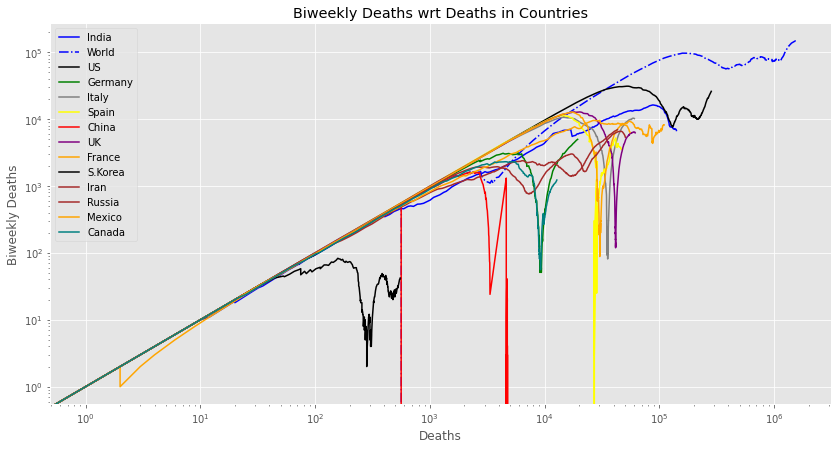

In [16]:
plot2(Deaths, Biweekly_Deaths, 'Biweekly Deaths')

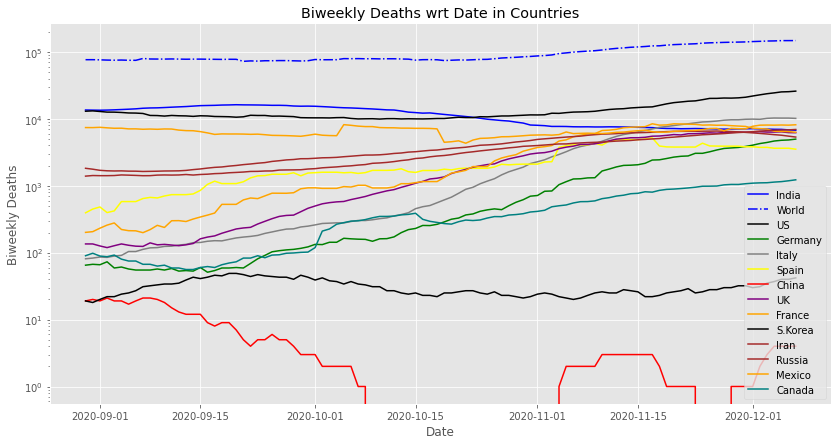

In [17]:
plotter(Biweekly_Deaths[Important_countries].tail(100), 'Biweekly Deaths', True)

In [18]:
# Biweekly increase in biweekly deaths
Increase_Biweekly = Biweekly_Deaths-Biweekly_Deaths.shift(14)
Increase_Biweekly = Increase_Biweekly.fillna(0).astype('int')
Increase_Biweekly[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-11-24,-433,28183,5923,1391,4346,276,-3,1668,1364,0,633,1286,869,342
2020-11-25,-492,26579,6398,1440,4027,-707,-3,1481,1325,3,593,1273,1046,321
2020-11-26,-531,24808,6180,1513,3794,-909,-3,1133,1051,3,560,1289,903,289
2020-11-27,-535,23883,6292,1594,3720,-992,-3,1175,690,2,409,1325,283,309
2020-11-28,-463,22183,5846,1642,3615,-992,-2,1056,416,3,282,1391,694,286
2020-11-29,-394,21511,5824,1673,3272,-992,-2,1097,241,6,186,1383,466,274
2020-11-30,-320,20558,6052,1697,3169,-1180,-2,1008,60,10,26,1387,318,259
2020-12-01,-253,19721,6832,1618,2845,-1370,-2,810,-1182,8,-134,1423,1306,291
2020-12-02,-193,20533,6932,1828,2375,-176,0,892,-910,8,-313,1490,1737,251


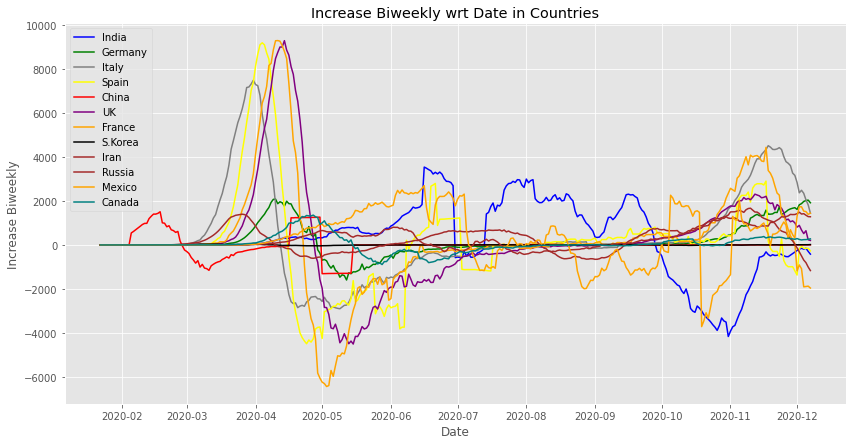

In [19]:
plotter(Increase_Biweekly[[c for c in Important_countries if c not in ['World', 'US']]], 'Increase Biweekly', False)

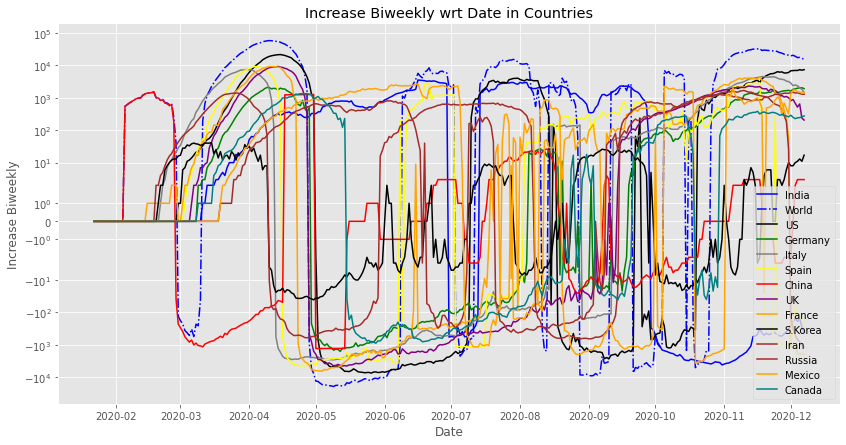

In [20]:
plotter(Increase_Biweekly, 'Increase Biweekly', log = 'symlog')

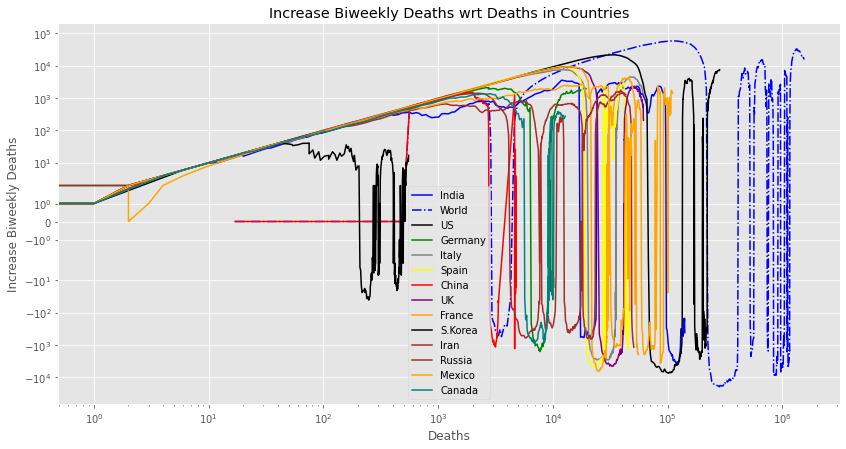

In [21]:
plot2(Deaths, Increase_Biweekly, 'Increase Biweekly Deaths', log = 'symlog')

In [22]:
Slope = np.round(Increase_Biweekly/Biweekly_Deaths, 4)
Slope[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-11-24,-0.0607,0.2088,0.3068,0.4559,0.4842,0.0638,-inf,0.2746,0.1694,0.0000,0.0968,0.2226,0.1260,0.3479
2020-11-25,-0.0693,0.1945,0.3170,0.4478,0.4437,-0.1798,-inf,0.2399,0.1636,0.1071,0.0906,0.2177,0.1459,0.3259
2020-11-26,-0.0754,0.1802,0.3058,0.4419,0.4097,-0.2323,-inf,0.1855,0.1311,0.1071,0.0853,0.2173,0.1257,0.2919
2020-11-27,-0.0763,0.1722,0.3076,0.4419,0.3900,-0.2544,-inf,0.1879,0.0858,0.0667,0.0628,0.2201,0.0428,0.2997
2020-11-28,-0.0656,0.1591,0.2868,0.4474,0.3735,-0.2544,-2.0000,0.1684,0.0527,0.1000,0.0437,0.2265,0.0964,0.2734
2020-11-29,-0.0557,0.1535,0.2830,0.4482,0.3382,-0.2544,-2.0000,0.1737,0.0309,0.1875,0.0291,0.2216,0.0655,0.2622
2020-11-30,-0.0451,0.1459,0.2880,0.4395,0.3220,-0.3092,-2.0000,0.1599,0.0078,0.3125,0.0041,0.2199,0.0449,0.2416
2020-12-01,-0.0355,0.1382,0.3117,0.4006,0.2875,-0.3584,-2.0000,0.1284,-0.1631,0.2667,-0.0217,0.2213,0.1688,0.2662
2020-12-02,-0.0273,0.1428,0.3037,0.4282,0.2417,-0.0470,0.0000,0.1388,-0.1276,0.2581,-0.0517,0.2271,0.2161,0.2274


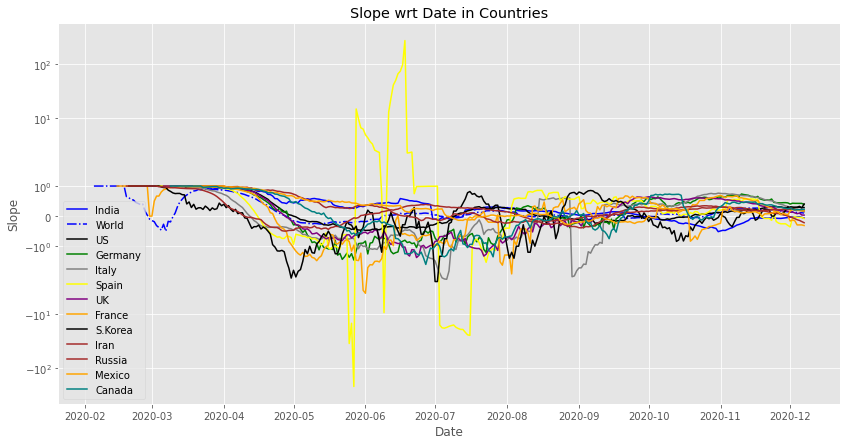

In [23]:
plotter(Slope[[c for c in Important_countries if c!='China']], 'Slope', log = 'symlog')

In [24]:
# Biweekly increase in increase of Biweekly Deaths
Growth_Increase_Biweekly = Increase_Biweekly-Increase_Biweekly.shift(14)
Growth_Increase_Biweekly = Growth_Increase_Biweekly.fillna(0).astype('int')
Growth_Increase_Biweekly[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-11-24,1430,2368,3568,170,1170,-1677,-6,-391,-2725,-3,-1041,371,235,46
2020-11-25,1175,-1427,3645,166,595,-3293,-6,-691,-2686,1,-992,382,336,22
2020-11-26,820,-4973,3331,168,77,-3645,-6,-1180,-3003,0,-940,406,108,-41
2020-11-27,561,-6475,3436,199,-204,-3780,-6,-1102,-3382,-5,-1087,513,-467,-31
2020-11-28,93,-9583,2755,312,-306,-3780,-5,-1181,-3568,-2,-1147,572,-118,-69
2020-11-29,140,-10060,2490,328,-848,-3780,-5,-1051,-3583,4,-1086,511,-453,-83
2020-11-30,158,-11706,2580,360,-1062,-3911,-5,-1162,-3739,13,-1189,526,-681,-124
2020-12-01,62,-13207,3873,32,-1500,-4278,-5,-1406,-5626,10,-1309,553,573,-26
2020-12-02,243,-8297,3101,425,-2146,-345,-1,-1060,-4301,7,-1442,628,1250,-100


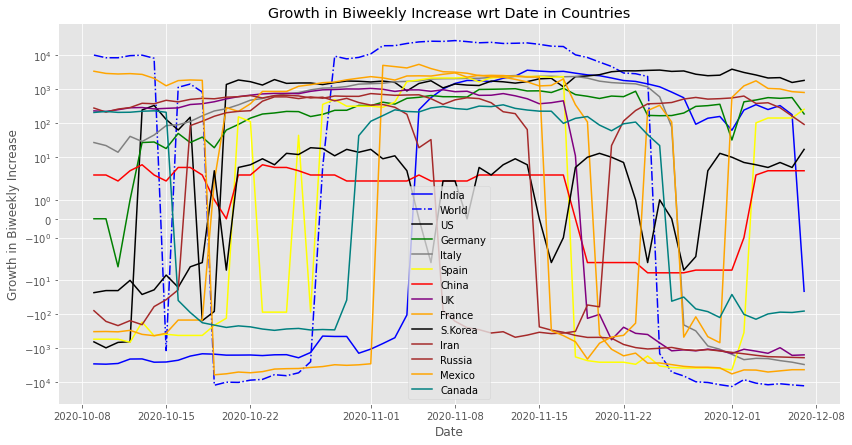

In [25]:
plotter(Growth_Increase_Biweekly.tail(60), 'Growth in Biweekly Increase', log = 'symlog')

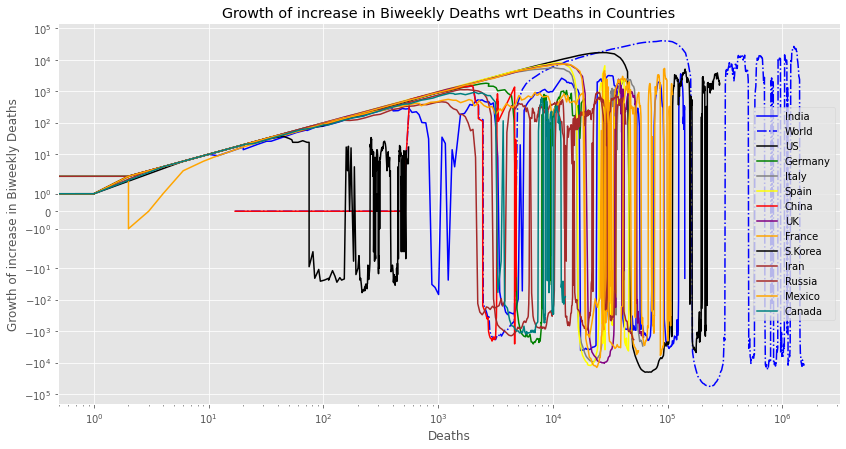

In [26]:
plot2(Deaths, Growth_Increase_Biweekly, 'Growth of increase in Biweekly Deaths', log = 'symlog')

In [27]:
Slope_growth = np.round(Growth_Increase_Biweekly/Biweekly_Deaths, 4)
Slope_growth[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-11-24,0.2006,0.0175,0.1848,0.0557,0.1303,-0.3879,-inf,-0.0644,-0.3384,-0.1154,-0.1593,0.0642,0.0341,0.0468
2020-11-25,0.1654,-0.0104,0.1806,0.0516,0.0656,-0.8375,-inf,-0.1119,-0.3316,0.0357,-0.1516,0.0653,0.0469,0.0223
2020-11-26,0.1164,-0.0361,0.1648,0.0491,0.0083,-0.9315,-inf,-0.1932,-0.3746,0.0000,-0.1431,0.0684,0.0150,-0.0414
2020-11-27,0.0800,-0.0467,0.1680,0.0552,-0.0214,-0.9695,-inf,-0.1763,-0.4205,-0.1667,-0.1669,0.0852,-0.0706,-0.0301
2020-11-28,0.0132,-0.0687,0.1352,0.0850,-0.0316,-0.9695,-5.0,-0.1884,-0.4516,-0.0667,-0.1778,0.0932,-0.0164,-0.0660
2020-11-29,0.0198,-0.0718,0.1210,0.0879,-0.0876,-0.9695,-5.0,-0.1664,-0.4595,0.1250,-0.1702,0.0819,-0.0637,-0.0794
2020-11-30,0.0222,-0.0831,0.1228,0.0932,-0.1079,-1.0249,-5.0,-0.1843,-0.4858,0.4062,-0.1897,0.0834,-0.0962,-0.1157
2020-12-01,0.0087,-0.0926,0.1767,0.0079,-0.1516,-1.1190,-5.0,-0.2229,-0.7761,0.3333,-0.2123,0.0860,0.0740,-0.0238
2020-12-02,0.0344,-0.0577,0.1359,0.0996,-0.2184,-0.0921,-0.5,-0.1649,-0.6029,0.2258,-0.2384,0.0957,0.1555,-0.0906


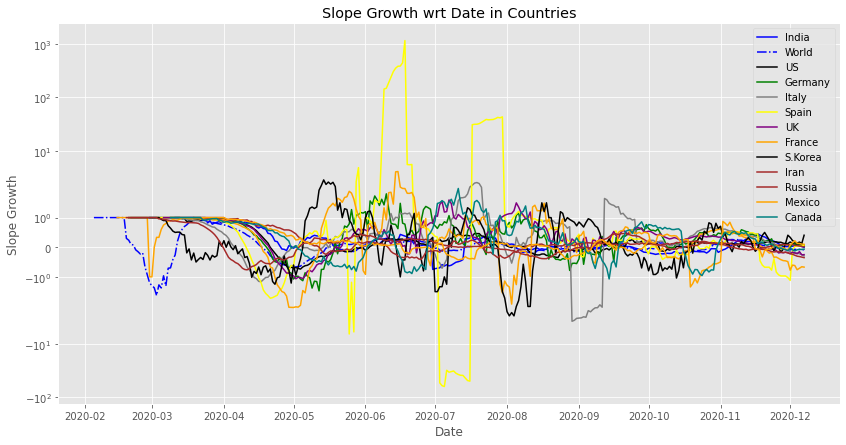

In [28]:
plotter(Slope_growth[[c for c in Important_countries if c!='China']], 'Slope Growth', log = 'symlog')

In [29]:
Biweekly_Growth = np.round(Deaths/Deaths.shift(14), 4)
Biweekly_Growth[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-11-24,1.0559,1.1059,1.0802,1.2590,1.2120,1.1099,1.0000,1.1218,1.1905,1.0534,1.1667,1.1869,1.0720,1.0919
2020-11-25,1.0554,1.1064,1.0834,1.2681,1.2113,1.0980,1.0000,1.1223,1.1902,1.0575,1.1650,1.1867,1.0743,1.0916
2020-11-26,1.0548,1.1063,1.0831,1.2803,1.2125,1.0967,1.0000,1.1197,1.1863,1.0574,1.1637,1.1868,1.0740,1.0914
2020-11-27,1.0543,1.1063,1.0837,1.2908,1.2161,1.0956,1.0000,1.1216,1.1830,1.0610,1.1605,1.1872,1.0678,1.0947
2020-11-28,1.0545,1.1062,1.0830,1.2933,1.2166,1.0956,1.0002,1.1209,1.1783,1.0609,1.1572,1.1887,1.0733,1.0956
2020-11-29,1.0543,1.1062,1.0836,1.2969,1.2139,1.0956,1.0002,1.1214,1.1748,1.0648,1.1538,1.1898,1.0722,1.0950
2020-11-30,1.0544,1.1062,1.0851,1.3009,1.2152,1.0925,1.0002,1.1207,1.1706,1.0648,1.1493,1.1901,1.0716,1.0968
2020-12-01,1.0544,1.1066,1.0881,1.3074,1.2130,1.0917,1.0002,1.1194,1.1564,1.0605,1.1452,1.1913,1.0782,1.0982
2020-12-02,1.0537,1.1065,1.0911,1.3188,1.2081,1.0891,1.0004,1.1204,1.1525,1.0622,1.1409,1.1926,1.0808,1.0982


In [30]:
Reproductivity = np.round(Biweekly_Deaths/Biweekly_Deaths.shift(14), 4)
Reproductivity[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-11-24,0.9427,1.2638,1.4426,1.8380,1.9387,1.0682,0.0000,1.3786,1.2039,1.0000,1.1072,1.2864,1.1442,1.5335
2020-11-25,0.9352,1.2414,1.4640,1.8108,1.7977,0.8476,0.0000,1.3156,1.1955,1.1200,1.0997,1.2783,1.1709,1.4834
2020-11-26,0.9299,1.2199,1.4405,1.7917,1.6940,0.8115,0.0000,1.2277,1.1509,1.1200,1.0932,1.2776,1.1437,1.4123
2020-11-27,0.9291,1.2080,1.4443,1.7919,1.6394,0.7972,0.0000,1.2314,1.0939,1.0714,1.0670,1.2823,1.0447,1.4280
2020-11-28,0.9385,1.1892,1.4021,1.8097,1.5960,0.7972,0.3333,1.2026,1.0556,1.1111,1.0457,1.2929,1.1067,1.3763
2020-11-29,0.9472,1.1814,1.3947,1.8121,1.5110,0.7972,0.3333,1.2102,1.0319,1.2308,1.0300,1.2846,1.0701,1.3554
2020-11-30,0.9569,1.1708,1.4045,1.7842,1.4748,0.7638,0.3333,1.1903,1.0079,1.4545,1.0042,1.2819,1.0470,1.3186
2020-12-01,0.9657,1.1604,1.4529,1.6683,1.4034,0.7362,0.3333,1.1473,0.8598,1.3636,0.9787,1.2841,1.2030,1.3628
2020-12-02,0.9734,1.1666,1.4362,1.7489,1.3187,0.9551,1.0000,1.1611,0.8869,1.3478,0.9508,1.2938,1.2757,1.2943


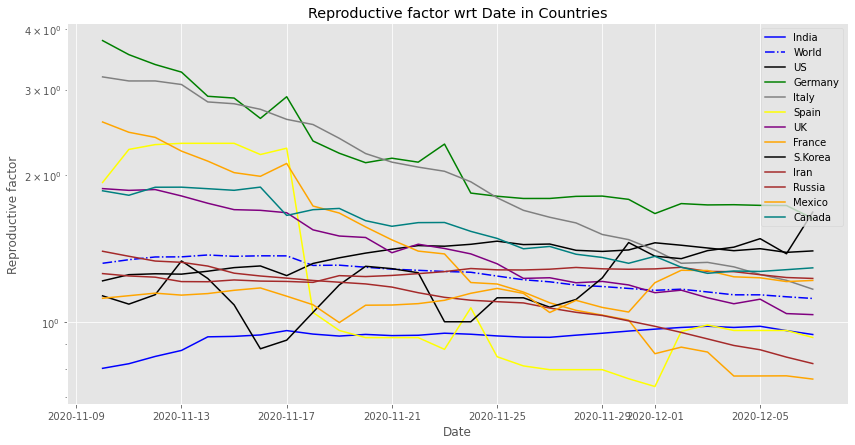

In [31]:
plotter(Reproductivity[[c for c in Important_countries if c != 'China']].tail(28), 'Reproductive factor', True)

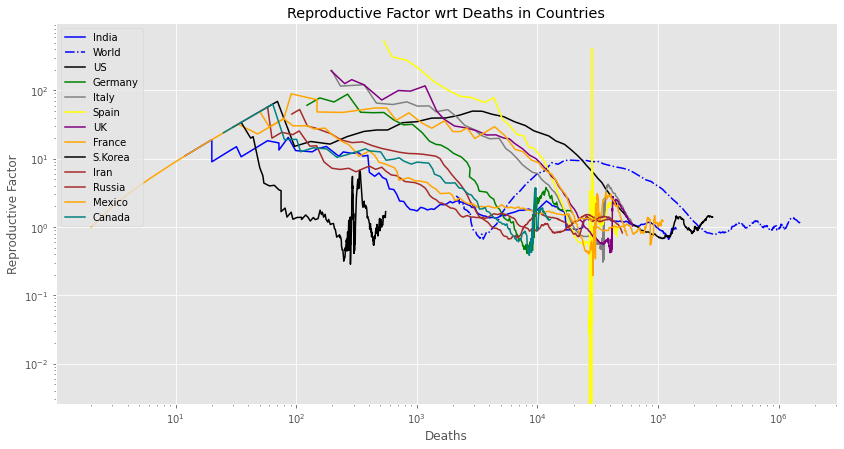

In [32]:
plot2(Deaths[[c for c in Important_countries if c != 'China']], 
      Reproductivity[[c for c in Important_countries if c != 'China']], 
      'Reproductive Factor', log = True)

In [33]:
Daily_Deaths = Deaths-Deaths.shift(1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-11-24,481,12778,2147,372,853,537,0,608,1012,3,483,483,813,106
2020-11-25,524,12057,2293,378,722,369,0,695,376,2,469,498,858,57
2020-11-26,492,10741,1234,430,822,337,0,498,341,1,482,515,645,85
2020-11-27,485,10621,1402,371,827,294,0,520,958,6,406,487,0,98
2020-11-28,496,9742,1189,170,686,0,1,479,213,1,391,501,1217,77
2020-11-29,443,6919,826,125,541,0,0,215,198,3,388,451,196,53
2020-11-30,482,8687,1172,388,672,401,0,203,409,0,372,364,285,101
2020-12-01,501,12848,2597,483,785,442,0,603,776,0,382,559,825,82
2020-12-02,526,12436,2804,482,684,273,1,648,311,3,362,580,800,113


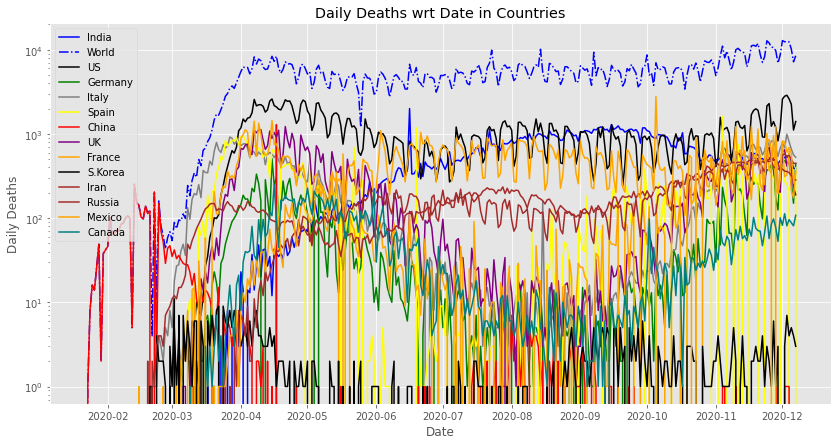

In [34]:
plotter(Daily_Deaths, 'Daily Deaths')

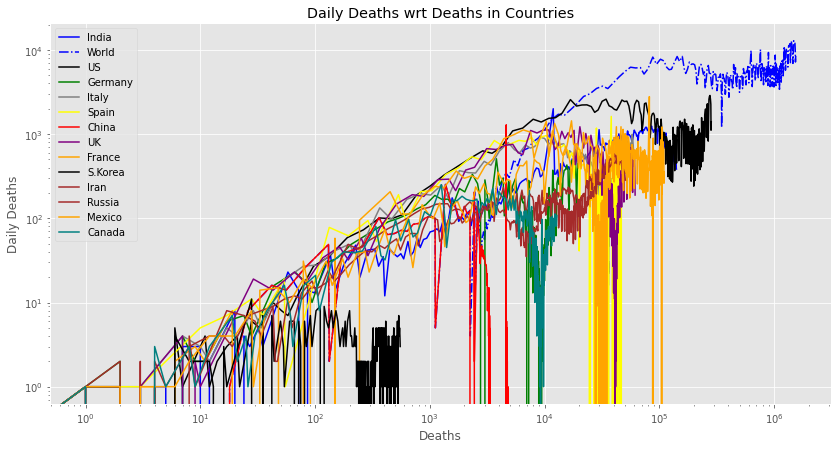

In [35]:
plot2(Deaths, Daily_Deaths, 'Daily Deaths')

In [36]:
#Confirmed = np.round(Removed + Removed*Reproductivity)
Confirmed = np.round(Removed * Biweekly_Growth)
Confirmed[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,,
2020-11-24,14222867.0,155897728.0,28077531.0,1867349.0,6218287.0,4846711.0,474200.0,6274788.0,5991072.0,54039.0,5336252.0,4352956.0,11013621.0,1274902.0
2020-11-25,14271435.0,157302199.0,28409131.0,1928780.0,6302152.0,4835263.0,474200.0,6355585.0,6034314.0,54461.0,5383116.0,4411320.0,11129426.0,1280774.0
2020-11-26,14315218.0,158476258.0,28534919.0,2002389.0,6408062.0,4866497.0,474200.0,6396622.0,6054994.0,54562.0,5433199.0,4472812.0,11195591.0,1289817.0
2020-11-27,14359566.0,159651259.0,28702661.0,2066700.0,6527660.0,4893826.0,474200.0,6465800.0,6151482.0,55384.0,5465375.0,4532136.0,11130961.0,1304445.0
2020-11-28,14414593.0,160714488.0,28812890.0,2092689.0,6613803.0,4893826.0,474395.0,6515455.0,6152140.0,55485.0,5495080.0,4597416.0,11318914.0,1313953.0
2020-11-29,14458565.0,161479868.0,28918358.0,2114725.0,6664797.0,4893826.0,474395.0,6542472.0,6157127.0,56008.0,5523702.0,4655330.0,11328329.0,1319037.0
2020-11-30,14510758.0,162440824.0,29085563.0,2171722.0,6753596.0,4923788.0,474395.0,6561138.0,6182992.0,56008.0,5544913.0,4699824.0,11352530.0,1332283.0
2020-12-01,14563584.0,163921322.0,29448556.0,2245721.0,6836589.0,4968436.0,474395.0,6621027.0,6197726.0,55782.0,5568879.0,4771156.0,11511402.0,1342989.0
2020-12-02,14609340.0,165282552.0,29835693.0,2328869.0,6891606.0,4986335.0,474590.0,6699544.0,6212666.0,56190.0,5589269.0,4845534.0,11625625.0,1355398.0


In [37]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

In [38]:
D = {
    'Deaths':Deaths,
    'Biweekly Deaths':Biweekly_Deaths,
    'Increase Biweekly':Increase_Biweekly,
    'GBI':Growth_Increase_Biweekly,
    'Slope Increase':Slope,
    'Slope Growth':Slope_growth ,
    'Removed':Removed,
    'Biweekly Growth':Biweekly_Growth,
    'Reproductive Factor':Reproductivity,
    'Daily Deaths':Daily_Deaths,
    'Confirmed':Confirmed
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
All_lastday = LastDay_DF
LastDay_DF = LastDay_DF[LastDay_DF.Deaths>=1200]

In [39]:
LastDay_DF.sort_values('Deaths', ascending = False)#.head(20)

,Deaths,Biweekly Deaths,Increase Biweekly,GBI,Slope Increase,Slope Growth,Removed,Biweekly Growth,Reproductive Factor,Daily Deaths,Confirmed
Country,,,,,,,,,,,
World,1544533,147620,15407,-12587,0.1044,-0.0853,154453300,1.1057,1.1165,8477,170779014.0
US,283703,25921,7381,1811,0.2847,0.0699,28370300,1.1006,1.3981,1404,31224352.0
Brazil,177317,7832,975,-651,0.1245,-0.0831,17731700,1.0462,1.1422,376,18550905.0
India,140958,6740,-419,-21,-0.0622,-0.0031,14095800,1.0502,0.9415,385,14803409.0
Mexico,110074,8148,1447,800,0.1776,0.0982,11007400,1.0799,1.2159,357,11886891.0
UK,61531,6204,206,-1551,0.0332,-0.2500,6153100,1.1121,1.0343,189,6842863.0
Italy,60606,10153,1450,-2982,0.1428,-0.2937,6060600,1.2012,1.1666,528,7279993.0
France,55613,6301,-1963,-4231,-0.3115,-0.6715,5561300,1.1278,0.7625,366,6272034.0
Iran,50594,5339,-1167,-1877,-0.2186,-0.3516,5059400,1.1180,0.8206,284,5656409.0


In [40]:
LastDay_DF.sort_values('Reproductive Factor', ascending = False)#.head(20)

,Deaths,Biweekly Deaths,Increase Biweekly,GBI,Slope Increase,Slope Growth,Removed,Biweekly Growth,Reproductive Factor,Daily Deaths,Confirmed
Country,,,,,,,,,,,
China,4746,4,3,4,0.7500,1.0000,474600,1.0008,4.0000,0,474980.0
Japan,2299,350,235,233,0.6714,0.6657,229900,1.1796,3.0435,40,271190.0
Serbia,2005,768,432,204,0.5625,0.2656,200500,1.6209,2.2857,56,324990.0
Sweden,7067,661,277,-36,0.4191,-0.0545,706700,1.1032,1.7214,0,779631.0
Turkey,15103,2592,1053,612,0.4062,0.2361,1510300,1.2072,1.6842,203,1823234.0
Azerbaijan,1675,515,207,72,0.4019,0.1398,167500,1.4440,1.6721,43,241870.0
Germany,19434,4974,1922,187,0.3864,0.0376,1943400,1.3440,1.6298,445,2611930.0
Afghanistan,1900,198,73,5,0.3687,0.0253,190000,1.1163,1.5840,26,212097.0
Greece,3092,1378,489,-156,0.3549,-0.1132,309200,1.8040,1.5501,89,557797.0
